#### Import Libraries

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### Load the dataset

In [4]:
df = pd.read_csv('Files/modifiedIris2Classes.csv')
df.shape

(100, 5)

#### Split the data into trainind and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['petal width (cm)']], df['target'], random_state=0)

#### Standardize the data

In [7]:
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [10]:
# 1. Import modelu
# from sklearn.linear_model import LogisticRegression

# 2. Tworzenie instancji modelu
clf = LogisticRegression()

# 3. Trenowanie modelu
clf.fit(X_train, y_train)

LogisticRegression()

#### Prognozowanie etykiet dla nowych, jeszcze nieznanych danych

In [13]:
# Jedna obserwacja 'petal length' po standaryzacji
X_test[0].reshape(1, -1)

array([[-0.65303909]])

In [14]:
print('Prediction', clf.predict(X_test[0].reshape(1, -1))[0])
print('Probability', clf.predict_proba(X_test[0].reshape(1, -1)))

Prediction 0
Probability [[0.82895927 0.17104073]]


#### Wyświetlenie wyników

In [16]:
example_df = pd.DataFrame()
example_df.loc[:, 'petal length (cm)'] = X_test.reshape(-1)
example_df.loc[:, 'target']  = y_test.values
example_df['logistic_preds'] = pd.DataFrame(clf.predict_proba(X_test))[1]

In [20]:
example_df.head()

,petal length (cm),target,logistic_preds
0,-0.653039,0,0.171041
1,1.713045,1,0.994274
2,-0.416431,0,0.288078
3,1.003219,1,0.958371
4,0.293394,1,0.753219


#### Wykres

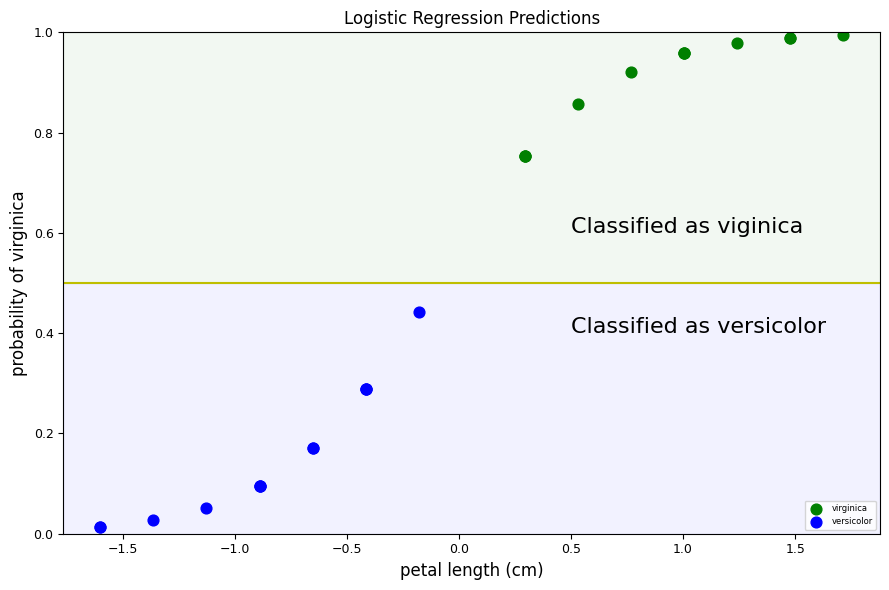

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9,6));


virginicaFilter = example_df['target'] == 1
versicolorFilter = example_df['target'] == 0

ax.scatter(example_df.loc[virginicaFilter, 'petal length (cm)'].values,
            example_df.loc[virginicaFilter, 'logistic_preds'].values,
           color = 'g',
           s = 60,
           label = 'virginica')


ax.scatter(example_df.loc[versicolorFilter, 'petal length (cm)'].values,
            example_df.loc[versicolorFilter, 'logistic_preds'].values,
           color = 'b',
           s = 60,
           label = 'versicolor')

ax.axhline(y = .5, c = 'y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.5, .6, 'Classified as viginica', fontsize = 16)
ax.text(0.5, .4, 'Classified as versicolor', fontsize = 16)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 6)
ax.tick_params(labelsize = 9)
ax.set_xlabel('petal length (cm)', fontsize = 12)
ax.set_ylabel('probability of virginica', fontsize = 12)
ax.set_title('Logistic Regression Predictions', fontsize = 12)
fig.tight_layout()


#### Mierzenie wydajności modelu

In [29]:
score = clf.score(X_test, y_test)
print(score)  # 100% dokładności

1.0


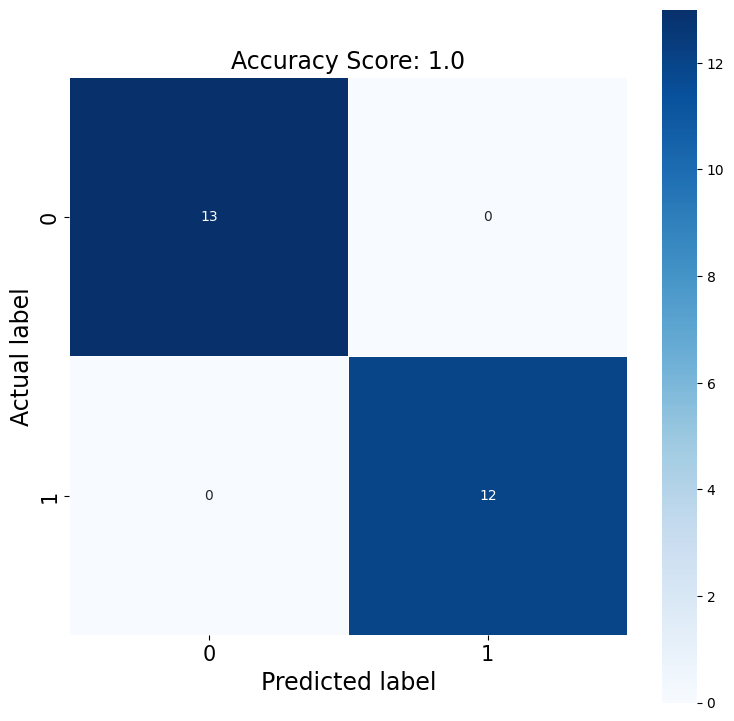

In [30]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)